In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from collections import deque

# Parte A (Modelo logístico e isoclinas)

Durante el periodo de 1790 a 1930 la población de Estados Unidos $P(t)$ ($t$ en años) creció de 3.9 millones a 123.2 millones. 

En este lapso, $P(t)$ permaneció cercana a la solución del problema de valor inicial:

$$\frac{dP}{dt} = 0.03135P − 0.0001489P^2 \quad , \quad P(0) = 3.9$$

(Análisis Teorico del Modelo desde el punto de vista de una EDO) (Issue #A.1)

(Representar el problema como una EDO, identificar parámetros, condiciones iniciales y contexto físico/biológico)

### Preguntas clave:

1. ¿Qué población se predice para 1930?

(Issue #A.1)

2. ¿Qué población límite se pronostica?

(Issue #A.1)

3. ¿Esta ecuación logística ha continuado siendo precisa desde 1930 para modelar a la población de Estados Unidos?

(Issue #A.1)

1. Dibuje el campo de isoclinas en el plano $(t, P)$ para esta ecuación y analice cualitativamente la convergencia hacia la capacidad máxima.

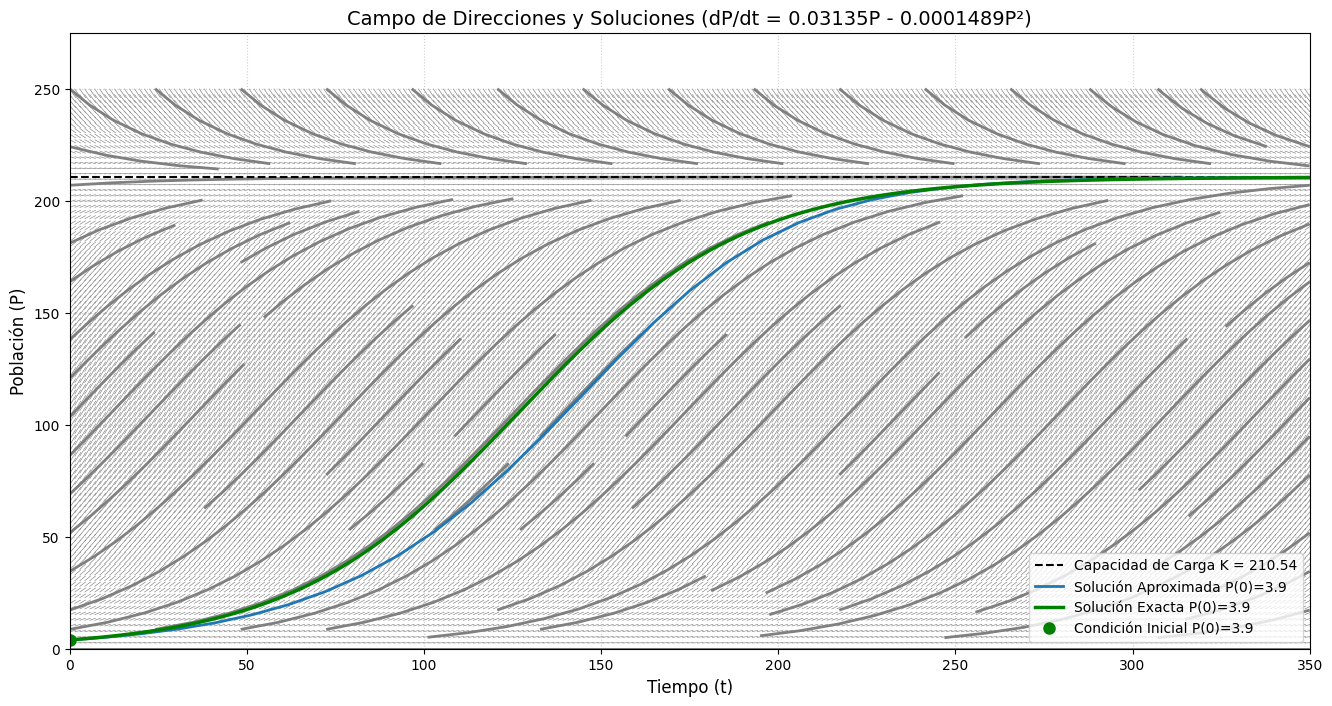

In [77]:
a = 0.03135
b = 0.0001489

def diff_eq(P, t): 
    return a * P - b * P**2

# --- Parámetros de la Solución ---
K = a / b  # Capacidad de Carga (Punto de convergencia/equilibrio)
t_final = 350
initial_conditions = [(0, 3.9)]

# Create a grid of x and y values
x = np.linspace(0, t_final, 250)
y = np.linspace(0, 250, 100)

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# Calculate the slopes at each point in the grid
DYDX = diff_eq(Y, X)

# Plot figure
plt.figure(figsize=(16, 8))

# Plot the direction field
plt.quiver(X, Y, np.ones_like(DYDX), DYDX, scale=200, color='gray', width=0.0005, headlength=0, headaxislength=0)
plt.streamplot(X, Y, np.ones_like(DYDX), DYDX, density=1, color='gray', linewidth=2, arrowsize=0)

# Plot the convergence line
plt.hlines(K, 0, t_final, color='black', linestyle='--', linewidth=1.5, label=f'Capacidad de Carga K = {K:.2f}')

for initial_condition in initial_conditions:
    # Plot solution curves using isoclines method
    x_values = np.linspace(initial_condition[0], t_final, 35)

    y_values = [initial_condition[1]]
    for xi in x_values[1:]:
        yi = y_values[-1]
        y_next = yi + diff_eq(yi, xi) * (x_values[1] - x_values[0])
        y_values.append(y_next)
    plt.plot(x_values, y_values, label=f'Solución Aproximada P({initial_condition[0]})={initial_condition[1]}', linewidth=2)

    # Plot solution curves using odeint
    t_values_precise = np.linspace(initial_condition[0], t_final, 300) 
    P_solution_precise = odeint(diff_eq, initial_condition[1], t_values_precise)[:, 0]
    
    plt.plot(t_values_precise, P_solution_precise, color='green', label=f'Solución Exacta P({initial_condition[0]})={initial_condition[1]}', linewidth=2.5)

    # Plot la Initial Condition
    plt.plot(initial_condition[0], initial_condition[1], 'go', markersize=8, label=f'Condición Inicial P({initial_condition[0]})={initial_condition[1]}')


# Título y Etiquetas
plt.title(f'Campo de Direcciones y Soluciones (dP/dt = {a}P - {b}P²)', fontsize=14)
plt.xlabel('Tiempo (t)', fontsize=12)
plt.ylabel('Población (P)', fontsize=12)
plt.ylim(0, 1.1 * max(np.max(Y), K)) # Ajustamos el límite Y para incluir K
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

#### Análisis Cualitativo de la Convergencia (Población P vs. Tiempo t)

La convergencia en este modelo logístico se rige por la Capacidad de Carga (K) y se observa un patrón de crecimiento en forma de "S" (sigmoidal).

1. Punto de Equilibrio (Capacidad de Carga K)

- Identificación: La capacidad máxima (o de carga) se calcula como K=a/b ($\frac{dP}{dt} = a*P - b*P^2$). El gráfico indica $K = 210.54$.

- Comportamiento del Campo de Direcciones:

La línea horizontal discontinua negra en $P≈210.54$ representa una isoclina cero ($\frac{dP}{dt}=0$).

Los segmentos de dirección (flechas grises) a lo largo de esta línea son perfectamente horizontales. Esto indica que, una vez que la población alcanza $K$, el crecimiento se detiene ($\frac{dP}{dt}=0$).

- Estabilidad: El campo de direcciones muestra que:

Para $P<K$, las pendientes son positivas (el crecimiento empuja $P$ hacia arriba, acercándose a $K$).

Para $P>K$ (la parte superior del gráfico), las pendientes son negativas (el crecimiento se vuelve negativo, empujando $P$ hacia abajo, de vuelta hacia $K$).

- Conclusión: El punto $P=K$ es un punto de equilibrio estable o atractor. La población convergerá hacia él independientemente de la condición inicial (si $P_0​>0$).

2. Comportamiento de la Solución (Curva de Crecimiento Sigmoidal)

La curva de solución (verde) partiendo de la condición inicial $P(0)=3.9$ exhibe el crecimiento característico del modelo logístico:

- Fase de Inicio (Crecimiento Lento): De $t=0$ a $t≈50$. El crecimiento es lento ya que la población es pequeña ($P≪K$) y la escasez de población limita la reproducción (la función $0.03135P$ domina).

- Fase de Aceleración (Crecimiento Exponencial): De $t≈50$ a $t≈150$. La curva es convexa, y el crecimiento es casi exponencial. Esto ocurre porque la población es lo suficientemente grande para reproducirse rápidamente, y los recursos aún no son un factor limitante (el término cuadrático $−bP^2$ es pequeño).

- Punto de Inflexión (Crecimiento Máximo): Alrededor de $P=K/2≈105$. En este punto ($t≈150$), el crecimiento es máximo ($\frac{d^2P}{dx^2}​=0$). A partir de aquí, el factor limitante (la competencia por recursos, dada por $−bP^2$) se vuelve más significativo.

- Fase de Desaceleración y Convergencia: De $t≈200$ en adelante. La curva se vuelve cóncava, y la tasa de crecimiento disminuye rápidamente a medida que $P$ se acerca a $K$.

- Convergencia Asintótica: La solución se acerca a la línea $P=K$ de forma asintótica (nunca la cruza), demostrando que $\lim \limits_{t \to \infty}P(t) = K$. En el gráfico, la curva se vuelve prácticamente indistinguible de la línea $K$ después de $t≈300$.

3. Precisión Numérica

- Solución Aproximada (Azul) vs. Solución Exacta (Verde): Se observa que la Solución Aproximada (Método de Euler con un $\Delta t$ grande) subestima sistemáticamente el valor de la población durante la fase de crecimiento más rápido, desviándose de la solución exacta (Verde). Sin embargo, ambas curvas convergen cualitativamente hacia el mismo punto de equilibrio $K=210.54$.

[Este problema está basado en el modelo de Verhulst, quien en 1845 utilizó los datos de la
población de Estados Unidos del periodo 1790-1840 para predecir con precisión su evolución
hasta el año 1930 (por supuesto, mucho después de su propia muerte).]

### Planteamiento del Problema:

Para garantizar que nuestro problema esté bien planteado es suficiente y necesario garantizar las siguientes propiedades:
1. Existencia de la Solución
2. Unicidad de la Solución
3. Dependencia Continua de los Datos (Estabilidad Numérica)

En el caso de las EDOs, esta evaluación se basa en las tres condiciones de Hadamard que se aplican a los Problemas de Valor Inicial (PVI).

Para una EDO de primer orden de la forma general:

$$​y^′=f(t,y) \quad , \quad y(t_0​)=y_0$$

El problema se considera bien planteado si se cumplen las siguientes condiciones:

1. Existencia de la Solución (Teórica)

Debe haber al menos una función $y(t)$ que satisfaga la EDO y la condición inicial en la vecindad del punto inicial $(t_0​,y_0​)$.

Con el Criterio de Existencia (Teorema de Peano) es suficiente con demostrar que $f(t, y)$ es continua para asegurar que para cada problema con valores iniciales $y(x_0) = y_ 0$ para $f$ va a existir una solucion $z$ (no necesariamente única) tal que $​z^′=f(t,z) , z(x_0​)=y_0$.

Esto debido a que al integrar la EDO en el intervalo desde $x_0$ hasta $x$ obtenemos:

$$ \int_{x_0}^{​x​}y^′(t) = \int_{x_0}^{​x​}f(t,y(t))dt$$
$$y(x) - y_0 = \int_{x_0}^{​x​}f(t,y(t))dt$$
$$y(x) = y_0 ​+ \int_{x_0}^{​x​}f(t,y(t))dt$$

Y teniendo $f$ continua, la integral tiene solución (Por criterio de suficiencia de funciones Rienman-Integrables) y por tanto también la tiene la EDO.


2. Unicidad de la Solución (Teórica)

La solución debe ser única. Esta es la condición más estricta que excluye los casos donde múltiples curvas solución pasan por el mismo punto inicial.

Con el Criterio de Unicidad (Teorema de Picard-Lindelöf o Cauchy-Lipschitz) basta que tanto $f(t, y)$ como $\frac{\partial f}{\partial y}$ sean continuas para que la solución sea única.

Esto se debe a que si $\frac{\partial f}{\partial y}$​ es continua en un dominio cerrado y acotado (un rectángulo $R$), entonces la función $\frac{\partial f}{\partial y}$ está acotada en ese rectángulo, por lo que podemos decir que existe un valor máximo $L$ para $|\frac{\partial f}{\partial y}|$ en $R$.

Usando el Teorema del Valor Medio, esta acotacia garantiza que existe un $L$ (El valor máximo) tal que $|f(t, y_1) - f(t, y_2)| \leq L |y_1 - y_2|$ para $(t, y_1)$ y $(t, y_2)$ en ese dominio (Condición de Lipschitz)

Si existieran dos soluciones distintas $y_1(t)$ y $y_2(t)$ que parten del mismo punto inicial $y(x_0) = y_0$ con $(x_0, y_0)$ en el dominio $R$, al ser soluciones tenemos que $|y_1^′(x) - y_2^′(x)| = |f(t, y_1) - f(t, y_2)| \leq L |y_1 - y_2|$, por lo que se restringe la rapidez con que estas soluciones pueden separarse.

El Lema de Gronwall asegura que siendo $u(t)$ continua tal que $u(t) \leq A + B\int_{t_0}^tu(s)ds$ con $A$ y $B$ constantes positivas, entonces $u(t) \leq Ae^{B(t - t_0)}$. Esto se cumple al tomar una función auxiliar $v(t) = A + \epsilon + B\int_{t_0}^tu(s)ds$ para un $\epsilon > 0$ lo suficientemente pequeño, dado a que $u(t) < v(t)$ y al derivar $v(t)$ y resolver la EDO por Ecuaciones Separables respecto a t obtenemos:

$$\frac{dv}{dt} = Bu(t)$$
$$\frac{dv}{dt} \leq Bv$$
$$\frac{dv}{v} \leq Bdt$$
$$\int_{t_0}^t\frac{dv}{v} \leq \int_{t_0}^tBdt$$
$$ln(v)|_{t_0}^t \leq B(t - t_0)$$
$$ln(\frac{v(t)}{v(t_0)}) \leq B(t - t_0)$$
$$\frac{v(t)}{A} \leq e^{B(t - t_0)}$$
$$v(t) \leq  Ae^{B(t - t_0)}$$

Como $u(t) < v(t)$ para $\epsilon \to 0$ tenemos que $u(t) \leq  Ae^{B(t - t_0)}$ 

Al aplicar Lema de Gronwall con $u(t) = |y_1 - y_2|$ (como $y_1$ y $y_2$ continuas $u(t)$ continua) se llega a que $u(x) \leq L\int_{x_0}^xu(t)dt$ integrando la Condición de Lipschitz, de donde $A = 0$ por lo que $u(t) \leq 0$, por lo que llegamos a que $y_1 = y_2$ en $R$.

3. Estabilidad Numérica (Dependencia Continua de los Datos)

Esta es la condición crítica para el análisis numérico, ya que asegura que un pequeño error en la condición inicial (y0​) o en la propia función f (por ejemplo, por errores de redondeo) no cause una gran desviación en la solución final.

Para los Problemas de Valor Inicial (PVI), si se cumplen las condiciones de existencia y unicidad (Lipschitzianidad), la estabilidad suele estar garantizada de forma local (es decir, el problema es intrínsecamente bien planteado en un sentido estricto).

Supongamos que tenemos dos soluciones, $y_1​(x)$ y $y_2​(x)$, que parten de dos condiciones iniciales muy cercanas:

$$y_1​(x_0​) = y_0​$$

$$y_2​(x_0​) = y_0 ​+ \epsilon$$

Aquí, $\epsilon$ representa una perturbación inicial muy pequeña.

Si las soluciones tuvieran una fuerte inestabilidad local, significaría que la pequeña diferencia $\epsilon$ podría generar una gran diferencia en las soluciones inmediatamente después de $x_0$​.

Sin embargo, la Condición de Lipschitz, junto con el Lema de Gronwall, permite demostrar que $∣y_1​(x) − y_2​(x)∣ \leq ∣\epsilon∣e^{L∣x − x_0​∣}$. En esta fórmula la diferencia inicial ($\epsilon$) se multiplica por un factor de creciemiento finito ($e^{L∣x − x_0​∣}$), dado a que al mantenerse en un intervalo local y acotado al rededor de $x_0$ (donde $∣x − x_0​∣$ es pequeño y finito) el número $e^{L∣x − x_0​∣}$ es una constante finita. Por lo tanto si la perturbación inicial ($\epsilon$) es muy pequeña, la diferencia entre las soluciones $y_1​(x)$ y $y_2​(x)$ también será pequeña en ese entorno local

Notemos que aunque garanticemos la Estabilidad Numérica o Local, no podemos garantizar que las soluciones $y_1​(x)$ y $y_2​(x)$ garanticen Estabilidad Asintótica (Comportamiento de la Solución a Largo Plazo), dado a que no controla el comportamiento de las soluciones en el infinito ($x \to \infty$).

En conclusión, si en una EDO se demuestra que tanto $f(t, y)$ como $\frac{\partial f}{\partial y}$ son continuas, se puede asegurar que se cumple Existencia y Unicidad de las Soluciones, y por tanto también Estabilidad Numérica, de donde podemos garantizar que nuestro problema está Bien Planteado

¿Qué ocurre en nuestra EDO?

En el caso de nuestra EDO, $f(t, P) = 0.03135P − 0.0001489P^2$ y $\frac{df}{dP} = 0.03135 − 2*0.0001489P$ son ambos polinomios y por tanto continuos, así que es un problema bien planteado.

### Análisis numérico:

#### Condicionamiento del Problema:

Para considerar nuestro problema como bien condicionado $k(t)$ debe ser pequeño (no mucho mayor que 1), siendo $k(t)$:

$$k(t) = \left| \frac{\text{cambio relativo en }P(t)}{\text{cambio relativo en }P_0} \right| = \left| \frac{\frac{\delta P(t) - P(t)}{P(t)}}{\frac{\delta P_0 - P_0}{P_0}} \right| = \left| \frac{P_0}{P(t)}\frac{\delta P(t) - P(t)}{\delta P_0 - P_0} \right| ≈ \left| \frac{P_0}{P(t)}\frac{\partial P(t)}{P_0} \right|$$

Donde $P(t)$ y $\delta P(t)$ son soluciones de la EDO con valores iniciales $P(t_0) = P_0$ y $\delta P(t_0) = P_0 + \delta$.

Tomando una $t$ finita, como demostramos anteriormente la EDO cumple con la condición de Lipschitz, y junto al Lema de Gronwall podemos asegurar que $|\delta P(t) - P(t)| \leq |\delta|\epsilon^{L|t-t_0|}$. Usando esto en la penúltima forma de $k(t)$ obtenemos:

$$k(t) = \left| \frac{P_0}{P(t)}\frac{\delta P(t) - P(t)}{\delta P_0 - P_0} \right| = \left| \frac{P_0}{P(t)} \epsilon^{L|t-t_0|} \right|$$

Como tomamos $t$ finito, podemos asegurar que el miembro derecho de la igualdad es finito y acotado en función del tiempo trascurrido.

Ahora anlicemos el comportamiento de $k(t)$ cuando $t \to \infty$.

Usando la última forma de $k(t)$, tomemos $Q(t) = \frac{\partial P(t)}{P_0}$. Derivando la EDO original por $P_0$ obtenemos la EDO para $Q(t)$:

$$\frac{dQ}{dt} = \frac{\partial f(P(t))}{\partial P} Q(t) \quad , \quad Q(t_0) = 1$$

Resolviendo como Ecuación Separable se obtiene $Q(t) = exp(\int \limits_{t_0}^t \frac{\partial f(P(\tau))}{\partial P}d\tau)$ y $k(t) = \left| \frac{P_0}{P(t)}Q(t) \right|$.

Como $\frac{\partial f​(P)}{\partial P} = f^′(P) = 0.03135 − 2(0.0001489)P$, para saber si la perturbación crece o decae, debemos analizar el signo de $f^′(P)$ a lo largo de la solución $P(t)$.

$f(P)$ tiene dos puntos de equilibrio: $P = 0$ y $P = K = \frac{0.03135}{0.0001489} ​≈ 210.54$. El primero de ellos tiene derivada positiva, por lo que es un punto de equilibrio inestable o repulsor, es decir, cualquier perturbacion aleja la solución de 0; mientras que K tiene derivada negativa, por lo que es asintóticamente estable (atractor), es decir, si la solución comienza cerca de K o se dirige hacia K, las fuerzas del sistema la "arrastran" hacia ese valor.

Cuando $P < 105.27$ tenemos que $f^′(P) > 0$ por lo que las perturbaciones crecen exponencialmente, pero cuando $P > 105.27$ $f^′(P) < 0$ donde la solución final $P(t)$ converge al punto de equilibrio estable $K$

Dado que la condición inicial es $P(0) = 3.9$ y la solución converge a $K ≈ 210.54$, la trayectoria $P(t)$ tiene dos fases:

1. Fase de Crecimiento del Error (inicial): $P(t)$ va de $3.9$ a $105.27$. La integral acumula valores positivos.
2. Fase de Decaimiento del Error (dominante): $P(t)$ va de $105.27$ a $K$. La integral acumula valores negativos que, a largo plazo, son mayores en magnitud que los positivos iniciales.

En conclusión, cuando $t \to \infty$ dado al comportamiento asintóticamente estable del sistema tenemos que:

$$\lim \limits_{t \to \infty} Q(t) = \lim \limits_{t \to \infty} exp(-\infty) = 0$$

Además:

$$\lim \limits_{t \to \infty} \frac{P_0}{P(t)} = \frac{3.9}{210.54} \text{  Constante pequeña y finita}$$

De donde el número de condición se determina por $\lim \limits_{t \to \infty} k(t) ≈ (\text{Constante finita}) * 0 = 0$.

En conclusión, como en intervalos finitos $k(t)$ es finito y acotado en función del tiempo transcurrido, y además $\lim \limits_{t \to \infty} k(t)$ es pequeño, podemos asegurar que el problema está bien condicionado.

#### Algoritmos Numéricos:

In [ ]:
a = 0.03135
b = 0.0001489

def f(t, P):
    return a*P - b*P**2

##### Método de Euler Mejorado

(Issue #A.3) (Implementar y determinar orden de convergencia y complejidad computacional)

##### Método de Runge-Kutta (RK4) 

(Issue #A.2) (Implementar y determinar orden de convergencia y complejidad computacional)

##### Método de Pasos Múltiples 

Los Métodos Lineales de Pasos Múltiples (LMM) son una clase de técnicas numéricas para la resolución de problemas de valor inicial de la forma $y^′ = f(t, y)$ como nuestra EDO, calculando la aproximación $y_{n+1}$ utilizando los valores previamente calculados de la solución $y$ y de la función derivada f en múltiples instantes anteriores:

$$y_{n+s} = \sum \limits_{j=0}^{s-1}\alpha_jy_{n+j} + h\sum \limits_{j=0}^s\beta_jf(t_{n+j}, y_{n+j})$$

donde $s$ es el número de pasos y $h$ el tamaño del paso.

En este caso utilizaremos una subclase de LMM conocida como métodos de Adams, caracterizada por usar únicamente el valor de $y$ del paso inmediato anterior ($\alpha _{s-1} = 1$ y $\alpha _j = 0$ para $j < s-1$)

La función f(t,y(t)) se aproxima mediante un polinomio interpolador de Lagrange (misma base para la selección de los coeficientes y demostración de orden de convergencia).

Esta clase de métodos a su vez está dividida en dos subclases más, que son:

1. Adams-Bashforth (AB): Métodos Explícitos

Los métodos Adams-Bashforth (AB) son explícitos (es decir $\beta _s​ = 0$).

- Derivación: El integrando $f(t,y(t))$ se interpola en los puntos anteriores conocidos al paso a calcular ($t_n$​, $t_{n−1}$​, …, $t_{n−s+1}$)​.

- Mecanismo: La fórmula resultante calcula $y_{n+1}$​ directamente utilizando solo información ya disponible.

- Propiedades: Un método AB de $s$ pasos alcanza un orden de precisión $p = s$ (Error Local de Truncamiento de $O(h^{s+1})$, y Error Global de $O(h^s)$). Son sencillos de implementar y requieren solo una evaluación de la función f por paso.

In [46]:
def AB(t_0, y_0, h, t, func, p = 4, beta = [55/24, -59/24, 37/24, -9/24]):
    """
    Approximates the solution of an ODE y' = func(t, y) using the p-step Adams-Bashforth method.

    Args:
        t_0 (float): Initial value of t.
        y_0 (float): Initial value of y.
        h (float): Step size.
        t (float): The target time to reach.
        func (callable): The function f(t, y) that defines the ODE.
        p (int): The order (number of steps) of the AB method (default is 4).
        beta (list): The Adams-Bashforth coefficients (default uses order 4 coefficients).
    
    Returns:
        list of tuples: A list of points (t_i, y_i) up to t_final.
    """
    if beta is None:
        if p == 1:
            beta = [1]
        elif p == 2:
            beta = [3/2, -1/2]
        elif p == 3:
            beta = [23/12, -16/12, 5/12]
        elif p == 4:
            beta = [55/24, -59/24, 37/24, -9/24]
        elif p == 5:
            beta = [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
        else:
            raise ValueError(f"Coefficients for AB order {p} not defined.")
    
    epsilon = h * 0.5 
    
    N = int(round((t - t_0) / h))
    
    if N <= 0:
        return [(t_0, y_0)]
        
    start_steps = min(p - 1, N)
    
    ans = rk4_method(t_0, y_0, h, start_steps, func)
    
    eval_func = deque(maxlen=p)
    for t_i, y_i in reversed(ans):
        if len(eval_func) < p: 
             eval_func.append(func(t_i, y_i))
        
    t_current = ans[-1][0]
    
    while t - t_current > epsilon:
        y_n = ans[-1][1] 
        
        sum_f = 0
        for j in range(p):
            sum_f += beta[j] * eval_func[j]
            
        t_next = t_current + h
        y_next = y_n + h * sum_f
        
        ans.append((t_next, y_next))
        t_current = t_next
        
        f_next = func(t_next, y_next)
        eval_func.appendleft(f_next)

    return ans
    

def rk4_method(t_0, y_0, h, s, func): # RK4 is used as a high-order 'starter' method (O(h^4) global error) to ensure the initial steps do not degrade the 4th-order accuracy of the Adams-Bashforth scheme.
    """
    Approximates the solution of an ODE y' = func(t, y) using the 
    4th-Order Runge-Kutta (RK4) method.

    Args:
        t_0 (float): Initial value of t.
        y_0 (float): Initial value of y.
        h (float): Step size.
        s (int): Number of steps to compute.
        func (callable): The function f(t, y) that defines the ODE.
        
    Returns:
        list of tuples: A list of points (t_i, y_i).
"""
    ans = [(t_0, y_0)]
    
    for i in range(s):
        t_i, y_i = ans[-1]
        
        k1 = h * func(t_i, y_i)
        
        t_mid = t_i + h / 2
        y_mid_k1 = y_i + k1 / 2
        k2 = h * func(t_mid, y_mid_k1)
        
        y_mid_k2 = y_i + k2 / 2
        k3 = h * func(t_mid, y_mid_k2)
        
        t_next = t_i + h
        y_next_k3 = y_i + k3
        k4 = h * func(t_next, y_next_k3)
        
        y_next = y_i + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
        ans.append((t_next, y_next))
        
    return ans

def multi_steps (t_0, y_0, h, t, func):
    """
    Approximates the solution of an ODE y' = func(t, y) using 4-step Adams-Bashforth method.

    Args:
        t_0 (float): Initial value of t.
        y_0 (float): Initial value of y.
        h (float): Step size.
        t (float): The target time to reach.
        func (callable): The function f(t, y) that defines the ODE.
        
    Returns:
        list of tuples: A list of points (t_i, y_i).
    """
    return AB(t_0, y_0, h, t, func)

In [47]:
t_init, y_init = (0, 3.9)
steps = 0.1
t_end = 1

answer = multi_steps(t_init, y_init, steps, t_end, f)

# --- Configuración de Formato ---
# Ancho de las columnas (ajusta según la necesidad)
WIDTH_T = 15
WIDTH_Y = 20
SEPARATOR = '-' * (WIDTH_T + WIDTH_Y + 5) # 5 por los 3 espacios y los 2 pipes

# --- Encabezado de la Tabla ---
print("\n" + SEPARATOR)
print(f"| {'Paso (i)':<5} | {'Tiempo (t)':<{WIDTH_T-2}} | {'y_aproximada':<{WIDTH_Y-2}} |")
print(SEPARATOR)

# --- Cuerpo de la Tabla ---
for i, (t, y) in enumerate(answer):
    # Formatear la salida para alinear decimales y usar 12 decimales de precisión
    # f-string: < alinea a la izquierda; .12f usa 12 decimales; > alinea a la derecha (para i)
    print(f"| {i:<5} | {t:<{WIDTH_T-2}.12f} | {y:<{WIDTH_Y-2}.12f} |")

# --- Pie de la Tabla ---
print(SEPARATOR)
print(f"Total de puntos calculados: {len(answer)} (de t={t_init} a t={t} con h={steps})")
print(SEPARATOR)


----------------------------------------
| Paso (i) | Tiempo (t)    | y_aproximada       |
----------------------------------------
| 0     | 0.000000000000 | 3.900000000000     |
| 1     | 0.100000000000 | 3.912018153807     |
| 2     | 0.200000000000 | 3.924072639216     |
| 3     | 0.300000000000 | 3.936163561719     |
| 4     | 0.400000000000 | 3.948291027088     |
| 5     | 0.500000000000 | 3.960455141375     |
| 6     | 0.600000000000 | 3.972656010913     |
| 7     | 0.700000000000 | 3.984893742314     |
| 8     | 0.800000000000 | 3.997168442474     |
| 9     | 0.900000000000 | 4.009480218572     |
| 10    | 1.000000000000 | 4.021829178068     |
----------------------------------------
Total de puntos calculados: 11 (de t=0 a t=0.9999999999999999 con h=0.1)
----------------------------------------


Este algoritmo tiene una complejidad computacional de $O(pN)$ siendo $p$ el número de pasos por iteración y $N$ el número de iteraciones necesarias (aprox $\frac{t - t_0}{h}$).

Pero al ser $p$ un pequeño valor constante del algoritmo que se use y estar la complejidad computacional de este dominada por el número de evaluaciones de $f$, podemos decir que es $O(N)$ (lineal respecto a la cantidad de pasos).

Por otro lado ya habíamos establecido un orden de convergencia de $p$: en el caso de AB4, $p = 4$ con Error Global de $O(h^4)$.

2. Adams-Moulton (AM): Métodos Implícitos

Los métodos Adams-Moulton (AM) son implícitos (es decir $\beta _s​\neq 0$).

- Derivación: El integrando $f(t,y(t))$ se interpola incluyendo el punto actual desconocido $t_{n+1}$​ junto con los puntos anteriores ($t_n$​, $t_{n−1}$​, …, $t_{n−s+1}$​​​).

- Mecanismo: La fórmula resultante requiere resolver una ecuación (implícita) para $y_{n+1}$​, ya que $f(t_{n+1}, y_{n+1})$​ depende de $y_{n+1}$​.

- Propiedades: Un método AM de $s$ pasos alcanza un orden de precisión $p = s+1$ (Error Local de Truncamiento de $O(h^{s+2})$, y Error Global de $O(h^{s+1})$), lo que los hace inherentemente más precisos. Son también más estables (mejor comportamiento para EDOs rígidas, o stiff).

Esquema Predictor-Corrector (ABM)

La implementación más eficiente y práctica es el esquema Predictor-Corrector (P-C), que utiliza un método AB de orden $p$ como Predictor para estimar $\tilde{y}_{n+1}$​, y un método AM de orden $p+1$ como Corrector para refinar el resultado:

- Predicción (P): $\tilde{y}_{n+1}$ $​\leftarrow$ AB (orden $p$)

- Evaluación (E): $\tilde{f}_{n+1}$ $​\leftarrow$ $f(t_{n+1}​,\tilde{y}_{​n+1}​)$

- Corrección (C): $y_{n+1}$ $​\leftarrow$ AM (orden $p+1$) utilizando $\tilde{f}_{​n+1}$​ en lugar de $f_{n+1​}$.

Este enfoque ABM (Adams-Bashforth-Moulton) aprovecha la alta precisión y estabilidad del corrector implícito sin el costo computacional de resolver la ecuación no lineal en cada paso.

In [48]:
def ABM(t_0, y_0, h, t, func, p = 4, beta = [251/720, 646/720, -264/720, 106/720, -19/720], beta_AB = [55/24, -59/24, 37/24, -9/24]):
    """
    Approximates the solution of an ODE y' = func(t, y) using the p-step Adams-Bashforth-Moulton method.

    Args:
        t_0 (float): Initial value of t.
        y_0 (float): Initial value of y.
        h (float): Step size.
        t (float): The target time to reach.
        func (callable): The function f(t, y) that defines the ODE.
        p (int): The order (number of steps) of the AB method (default is 4).
        beta (list): The Adams-Moulton coefficients (default uses order 4 coefficients).
        beta_AB (list): The Adams-Bashforth coefficients (default uses order 4 coefficients).
    
    Returns:
        list of tuples: A list of points (t_i, y_i) up to t_final.
    """
    if beta is None:
        if p == 1:
            beta = [1/2, 1/2]        
        elif p == 2:
            beta = [5/12, 8/12, -1/12] 
        elif p == 3:
            beta = [9/24, 19/24, -5/24, 1/24] 
        elif p == 4:
            beta = [251/720, 646/720, -264/720, 106/720, -19/720]
        elif p == 5:
            beta = [475/1440, 1427/1440, -798/1440, 482/1440, -173/1440, 27/1440] 
        else:
            raise ValueError(f"Coefficients for AM order {p+1} not defined.")
    
    epsilon = h * 0.5 
    
    N = int(round((t - t_0) / h))
    
    if N <= 0:
        return [(t_0, y_0)]
        
    start_steps = min(p - 1, N)
    
    ans = rk4_method(t_0, y_0, h, start_steps, func)
    
    eval_func = deque(maxlen=p)
    for t_i, y_i in reversed(ans):
        if len(eval_func) < p: 
             eval_func.append(func(t_i, y_i))
        
    t_current = ans[-1][0]
    
    while t - t_current > epsilon:
        y_n = ans[-1][1] 
        
        t_next = t_current + h
        
        sum_f = 0
        
        aprox_y_next = one_step_AB(h, y_n, eval_func, p, beta_AB)
        sum_f += beta[0] * func(t_next, aprox_y_next)
        
        for j in range(p):
            sum_f += beta[j + 1] * eval_func[j]
            
        y_next = y_n + h * sum_f
        
        ans.append((t_next, y_next))
        t_current = t_next
        
        f_next = func(t_next, y_next)
        eval_func.appendleft(f_next)

    return ans
    

def one_step_AB(h, y_n, eval_func, p, beta):
    """
    Calculates the approximation of y at the next step (y_{n+1}) using the 
    p-step Adams-Bashforth method.

    Args:
        h (float): The step size.
        y_n (float): The current solution value, y_n.
        eval_func (list): A list containing the function evaluations f_i 
                        from the previous p steps, ordered as [f_n, f_{n-1}, ..., f_{n-p+1}].
        p (int): The order (number of steps) of the AB method.
        beta (list): The Adams-Bashforth coefficients.
        
    Returns:
        float: The approximation of y at the next step, aprox_y_next.
    """
    if beta is None:
        if p == 1:
            beta = [1]
        elif p == 2:
            beta = [3/2, -1/2]
        elif p == 3:
            beta = [23/12, -16/12, 5/12]
        elif p == 4:
            # Coeficientes correctos para AB de orden 4
            beta = [55/24, -59/24, 37/24, -9/24]
        elif p == 5:
            beta = [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
        else:
            raise ValueError(f"Coefficients for AB order {p} not defined.")
        
    sum_f = 0
    for j in range(p):
        sum_f += beta[j] * eval_func[j]
            
    y_next = y_n + h * sum_f

    return y_next
    

def rk4_method(t_0, y_0, h, s, func): # RK4 is used as a high-order 'starter' method (O(h^4) global error) to ensure the initial steps do not degrade the 4th-order accuracy of the Adams-Bashforth scheme.
    """
    Approximates the solution of an ODE y' = func(t, y) using the 
    4th-Order Runge-Kutta (RK4) method.

    Args:
        t_0 (float): Initial value of t.
        y_0 (float): Initial value of y.
        h (float): Step size.
        s (int): Number of steps to compute.
        func (callable): The function f(t, y) that defines the ODE.
        
    Returns:
        list of tuples: A list of points (t_i, y_i).
"""
    ans = [(t_0, y_0)]
    
    for i in range(s):
        t_i, y_i = ans[-1]
        
        k1 = h * func(t_i, y_i)
        
        t_mid = t_i + h / 2
        y_mid_k1 = y_i + k1 / 2
        k2 = h * func(t_mid, y_mid_k1)
        
        y_mid_k2 = y_i + k2 / 2
        k3 = h * func(t_mid, y_mid_k2)
        
        t_next = t_i + h
        y_next_k3 = y_i + k3
        k4 = h * func(t_next, y_next_k3)
        
        y_next = y_i + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
        ans.append((t_next, y_next))
        
    return ans

def implicit_multi_steps (t_0, y_0, h, t, func = f):
    """
    Approximates the solution of an ODE y' = func(t, y) using 4-step Adams-Bashforth-Moulton method.

    Args:
        t_0 (float): Initial value of t.
        y_0 (float): Initial value of y.
        h (float): Step size.
        t (float): The target time to reach.
        func (callable): The function f(t, y) that defines the ODE.
        
    Returns:
        list of tuples: A list of points (t_i, y_i).
    """
    return ABM(t_0, y_0, h, t, func)

In [49]:
t_init, y_init = (0, 3.9)
steps = 0.1
t_end = 1

answer = implicit_multi_steps(t_init, y_init, steps, t_end)

# --- Configuración de Formato ---
# Ancho de las columnas (ajusta según la necesidad)
WIDTH_T = 15
WIDTH_Y = 20
SEPARATOR = '-' * (WIDTH_T + WIDTH_Y + 5) # 5 por los 3 espacios y los 2 pipes

# --- Encabezado de la Tabla ---
print("\n" + SEPARATOR)
print(f"| {'Paso (i)':<5} | {'Tiempo (t)':<{WIDTH_T-2}} | {'y_aproximada':<{WIDTH_Y-2}} |")
print(SEPARATOR)

# --- Cuerpo de la Tabla ---
for i, (t, y) in enumerate(answer):
    # Formatear la salida para alinear decimales y usar 12 decimales de precisión
    # f-string: < alinea a la izquierda; .12f usa 12 decimales; > alinea a la derecha (para i)
    print(f"| {i:<5} | {t:<{WIDTH_T-2}.12f} | {y:<{WIDTH_Y-2}.12f} |")

# --- Pie de la Tabla ---
print(SEPARATOR)
print(f"Total de puntos calculados: {len(answer)} (de t={t_init} a t={t} con h={steps})")
print(SEPARATOR)


----------------------------------------
| Paso (i) | Tiempo (t)    | y_aproximada       |
----------------------------------------
| 0     | 0.000000000000 | 3.900000000000     |
| 1     | 0.100000000000 | 3.912018153807     |
| 2     | 0.200000000000 | 3.924072639216     |
| 3     | 0.300000000000 | 3.936163561719     |
| 4     | 0.400000000000 | 3.948291027088     |
| 5     | 0.500000000000 | 3.960455141376     |
| 6     | 0.600000000000 | 3.972656010913     |
| 7     | 0.700000000000 | 3.984893742315     |
| 8     | 0.800000000000 | 3.997168442475     |
| 9     | 0.900000000000 | 4.009480218573     |
| 10    | 1.000000000000 | 4.021829178070     |
----------------------------------------
Total de puntos calculados: 11 (de t=0 a t=0.9999999999999999 con h=0.1)
----------------------------------------


Este algoritmo se diferencia del método Adams-Bashforth solamente en que en cada iteracion se calcula además aprox_y_next que tiene complejidad $O(p)$ y $f$(x_next, aprox_y_next) con $O(1)$, por lo que tiene una complejidad computacional de $O(2pN)$ siendo $p$ el número de pasos por iteración y $N$ el número de iteraciones necesarias (aprox $\frac{t - t_0}{h}$).

Por la misma razón que en el caso anterior podemos concluir a que tiene complejidad $O(N)$ o lineal respecto a número de pasos.

Por otro lado el orden de convergencia es de $p+1$: en el caso de ABM4, $p = 4$ con Error Global de $O(h^5)$ (quinto orden).

(Comparación entre los algoritmos anteriores y uso de benchmark para análisis de precisión)

(Issue #A.6)

#### Análisis del Error:

Realizar análisis de error: error relativo, análisis hacia adelante (perturbaciones en datos) y
hacia atrás (estabilidad del algoritmo)

(Issue #A.8)